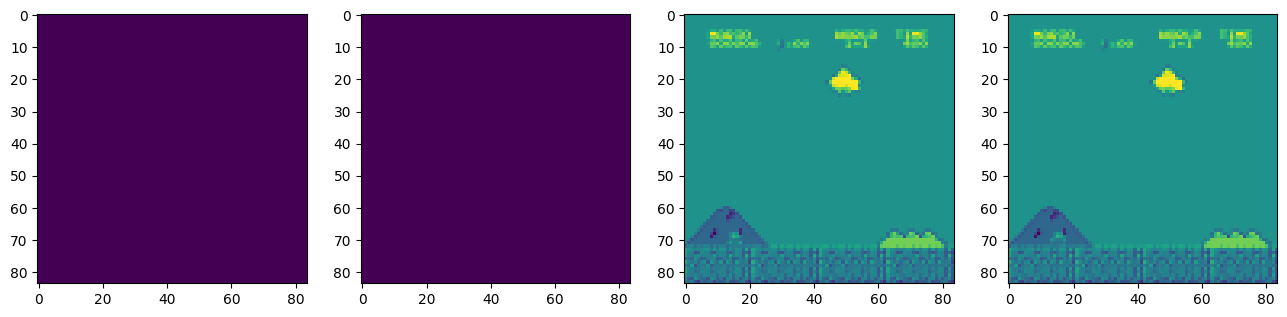

In [11]:
from utils import make_parallel_env, STAGE_PIXEL, STAGE_RECTANGLE, make_single_env

from matplotlib import pyplot as plt

test_env = make_single_env(STAGE_PIXEL)
test_env.reset()
state, reward, done, info = test_env.step([0])

def display_all_frame():
    plt.figure(figsize=(16,16))
    for idx in range(state.shape[3]):
        plt.subplot(1,4,idx+1)
        plt.imshow(state[0][:,:,idx])
    plt.show()
    
display_all_frame()

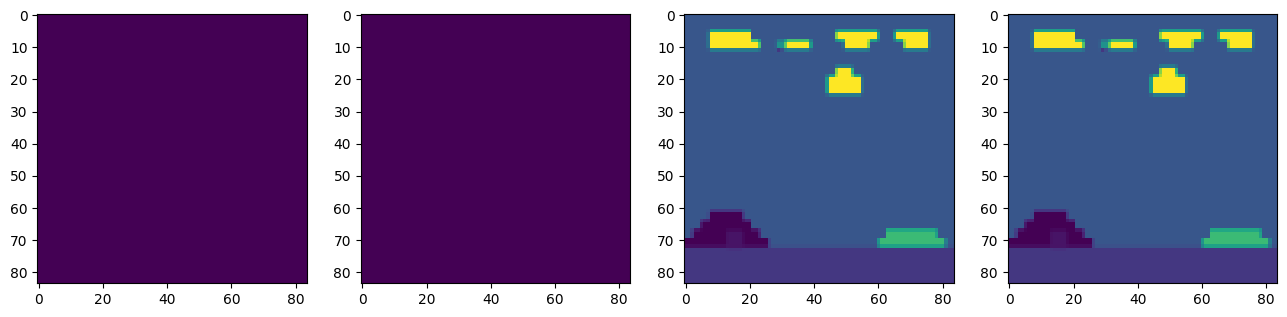

In [10]:
from utils import make_parallel_env, STAGE_PIXEL, STAGE_RECTANGLE, make_single_env

from matplotlib import pyplot as plt

test_env = make_single_env(STAGE_RECTANGLE)
test_env.reset()
state, reward, done, info = test_env.step([0])

def display_all_frame():
    plt.figure(figsize=(16,16))
    for idx in range(state.shape[3]):
        plt.subplot(1,4,idx+1)
        plt.imshow(state[0][:,:,idx])
    plt.show()
    
display_all_frame()

In [1]:
# Model Param
TOTAL_TIMESTEP_NUMB = 500_000
LEARNING_RATE = 0.0001
GAE = 1.0
ENT_COEF = 0.01
N_STEPS = 512
GAMMA = 0.9
BATCH_SIZE = 64
N_EPOCHS = 10

# Test Param
EVAL_FREQ = 10000
TEST_EPISODE_NUMBERS = 20

In [2]:
from pathlib import Path

save_dir = Path('./pixel_rect')

In [3]:
from model_cnn import MarioNet

policy_kwargs = dict(
    features_extractor_class=MarioNet,
    features_extractor_kwargs=dict(features_dim=512),
)

In [5]:
from utils import make_parallel_env, STAGE_PIXEL, STAGE_RECTANGLE, make_single_env

pixel = make_parallel_env(STAGE_PIXEL, 4)
rect = make_parallel_env(STAGE_RECTANGLE, 4)

# dict with the different environments and names
env = {
    'pixel': pixel,
    'rect': rect
}

In [ ]:
from stable_baselines3 import PPO
for key in env.keys():
    print(f"Training {key}")
    model = PPO('CnnPolicy', env[key], verbose=0, policy_kwargs=policy_kwargs, tensorboard_log=save_dir,
                learning_rate=LEARNING_RATE, n_steps=N_STEPS, batch_size=BATCH_SIZE, n_epochs=N_EPOCHS, gamma=GAMMA, gae_lambda=GAE, ent_coef=ENT_COEF)
    model.learn(total_timesteps=TOTAL_TIMESTEP_NUMB, tb_log_name=key, eval_env=eval, eval_freq=EVAL_FREQ, n_eval_episodes=TEST_EPISODE_NUMBERS)